In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('mcd_merge.csv')
# Inspect the data

df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

train_data_date = data_date[0:int(training_data_date), :]

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.56458207, 0.5641259 , 0.57197607, 0.57987219, 0.57827458,
       0.57873074, 0.57416703, 0.57804615, 0.57599238, 0.57485163,
       0.57188483, 0.56823345, 0.56663584, 0.55682314, 0.55408477,
       0.55545395, 0.54815119, 0.54130528, 0.53263333, 0.5248744 ,
       0.51939767, 0.52441824, 0.53035113, 0.53217717, 0.52898194,
       0.52122302, 0.52692817, 0.53308949, 0.54404364, 0.54187565,
       0.53354635, 0.55134641, 0.56047452, 0.57325401, 0.56640811,
       0.57827458, 0.56366905, 0.5595615 , 0.5618437 , 0.56047452,
       0.56672707, 0.56047452, 0.56321288, 0.56047452, 0.56093068,
       0.56001836, 0.56275672, 0.56229986, 0.56376097, 0.55819232,
       0.54952037, 0.55317175, 0.56344131, 0.56458207, 0.56229986,
       0.55317175, 0.55088955, 0.55864918, 0.55499779, 0.56823345])]
[0.5750793582256062]

[array([0.56458207, 0.5641259 , 0.57197607, 0.57987219, 0.57827458,
       0.57873074, 0.57416703, 0.57804615, 0.57599238, 0.57485163,
       0.57188483, 0.56823345, 0.566

Epoch 1/100
413/413 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 2/100
413/413 [==============================] - 3s 8ms/step - loss: 4.0825e-04
Epoch 3/100
413/413 [==============================] - 3s 8ms/step - loss: 3.2371e-04
Epoch 4/100
413/413 [==============================] - 4s 9ms/step - loss: 3.1409e-04
Epoch 5/100
413/413 [==============================] - 5s 13ms/step - loss: 2.7258e-04
Epoch 6/100
413/413 [==============================] - 6s 14ms/step - loss: 3.1121e-04
Epoch 7/100
413/413 [==============================] - 3s 7ms/step - loss: 2.5879e-04
Epoch 8/100
413/413 [==============================] - 3s 8ms/step - loss: 2.6619e-04
Epoch 9/100
413/413 [==============================] - 7s 17ms/step - loss: 2.5177e-04
Epoch 10/100
413/413 [==============================] - 3s 6ms/step - loss: 2.4136e-04
Epoch 11/100
413/413 [==============================] - 3s 7ms/step - loss: 2.5322e-04
Epoch 12/100
413/413 [==============================]

413/413 [==============================] - 7s 17ms/step - loss: 1.5145e-04
Epoch 95/100
413/413 [==============================] - 5s 13ms/step - loss: 1.5638e-04
Epoch 96/100
413/413 [==============================] - 10s 24ms/step - loss: 1.5590e-04
Epoch 97/100
413/413 [==============================] - 4s 9ms/step - loss: 1.6091e-04
Epoch 98/100
413/413 [==============================] - 12s 29ms/step - loss: 1.5049e-04
Epoch 99/100
413/413 [==============================] - 3s 8ms/step - loss: 1.5006e-04
Epoch 100/100
413/413 [==============================] - 12s 29ms/step - loss: 1.6567e-04


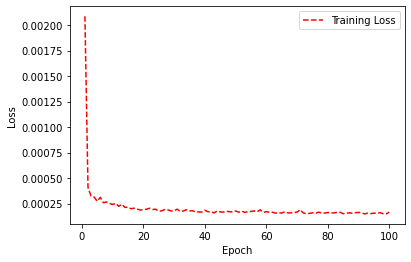

In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt

model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# Train the model
history = model2.fit(x_train, y_train, batch_size=16, epochs=100)


# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [6]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

# Get the root mean squared error (RMSE)
rmse_2 = np.sqrt(np.mean(((predictions2 - y_test) ** 2)))
rmse_2

0.27326067170119434

In [7]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [8]:
train = data[:training_data_len]
valid_2 = data[training_data_len:]
valid_2['Predictions2'] = predictions2

mape(valid_2['Close'], valid_2['Predictions2'])

<ipython-input-8-f46f1df8d4ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions2'] = predictions2


0.08167711202042047